# To Explore Unsupervised Machne Learning:

# Problem Statement

The goal is to predict optimum number of clusters and represent it visually

# Dataset:

This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant. The dataset has four features: sepal length, sepal width, petal length, and petal width. The fifth column is for species, which holds the value for these types of plants.

Let’s implement k-means clustering using a dataset: the Iris dataset. To predict optimum numbaer of clusters and represent it visually

# Importing the required libraries and data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("Iris.csv")
print('Data imported succefully')
data.head(5)

Data imported succefully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [3]:
#summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
#gives data info and structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#gives datatype
print(data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [7]:
#checking missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#gives data dimension
data.shape

(150, 6)

In [9]:
#gives column names
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.groupby('Species').sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


In [11]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data visualization

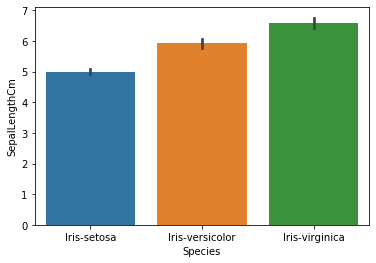

In [12]:
sns.barplot(data['Species'], data['SepalLengthCm'])

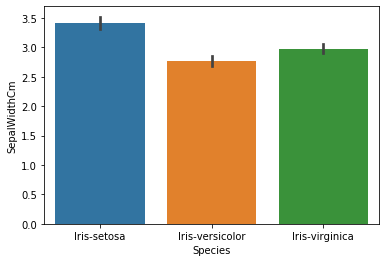

In [13]:
sns.barplot(data['Species'], data['SepalWidthCm'])

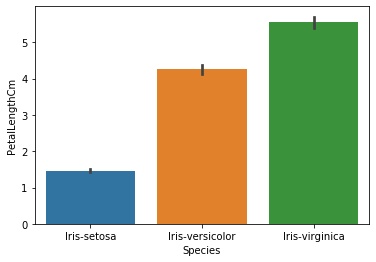

In [14]:
sns.barplot(data['Species'], data['PetalLengthCm'])

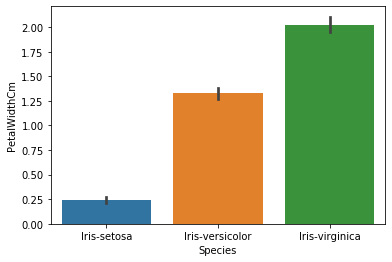

In [15]:
sns.barplot(data['Species'], data['PetalWidthCm'])

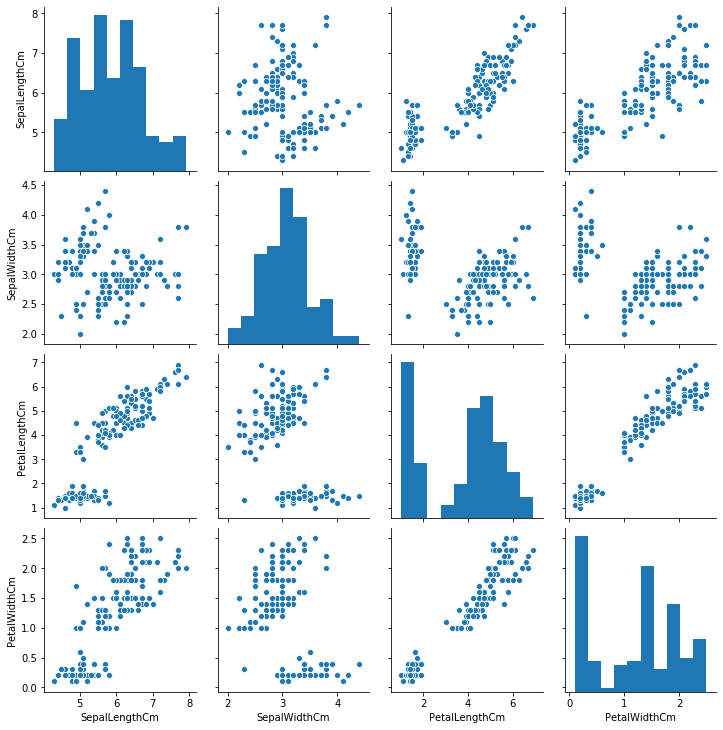

In [16]:
sns.pairplot(data.drop('Id',axis=1))

Text(0.5, 1.0, 'Cluster')

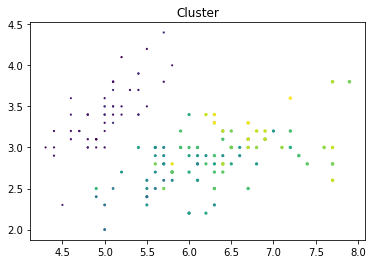

In [17]:

#plotting the data

plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])
plt.title('Cluster')

C:\Users\Lenovo\Anaconda4\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


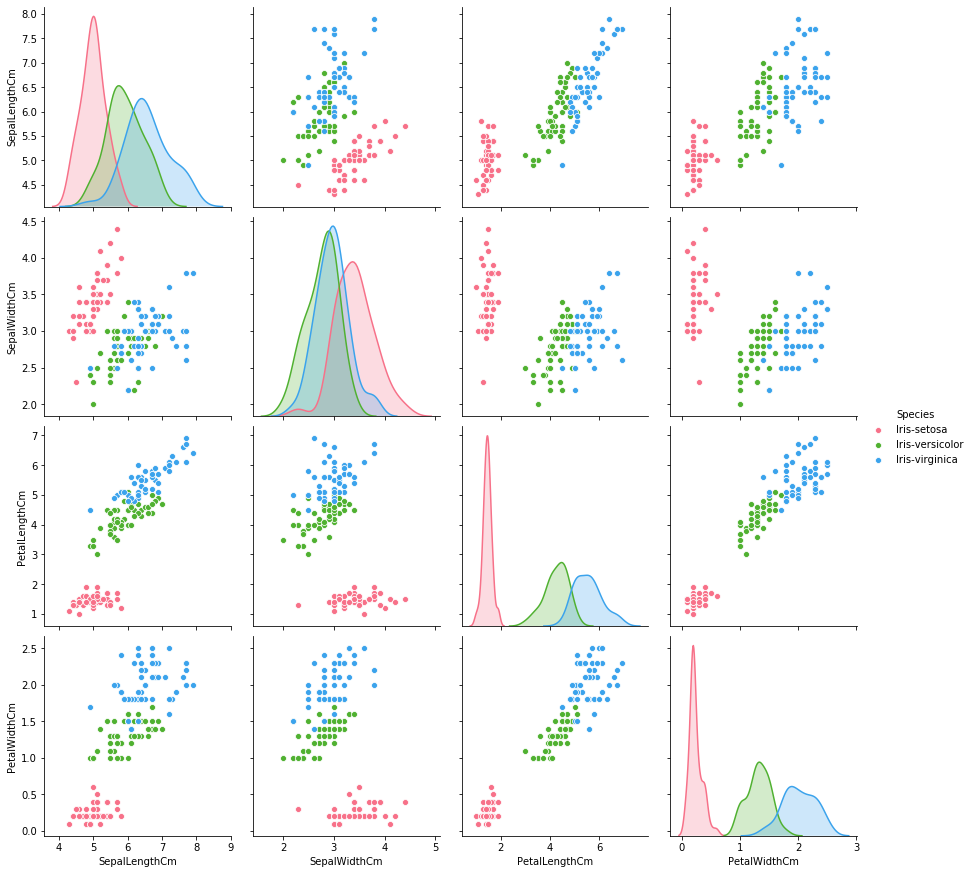

In [18]:
#plotting pair plot for "Species"
sns.pairplot(data.drop('Id',axis=1), hue="Species", palette="husl", size=3, diag_kind='kde')

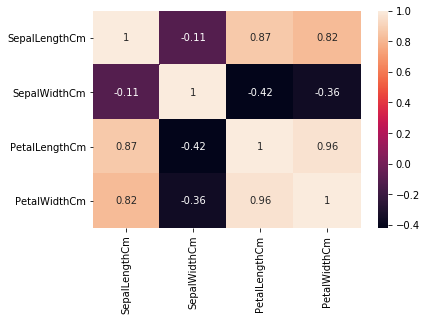

In [19]:
# Correlation Matrix
new_data= data.drop('Id',axis=1)
sns.heatmap(new_data.corr(), annot=True)

# Preparing the Algorithm : K Means Clustering

In [20]:
#Taking only required variables
X = data.iloc[:, [1, 2, 3, 4]].values

In [21]:
#Defining the kMean fun with initialization as k-means++

from sklearn.cluster import KMeans
wsse = [] #creating empty list # wsse==>within cluster SSE 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(X)                                      
    wsse.append(kmeans.inertia_)
 #"kmeans.inertia_" ==> its carry errors (SSE) in a new column(build using append)in the same data set
wsse

[680.8244,
 152.36870647733903,
 78.94084142614601,
 57.31787321428571,
 46.53558205128205,
 38.95701115711986,
 34.19068792479663,
 30.27495426400225,
 28.10402813852814,
 26.523114676173503]

# Elbow Curve - Helps to determining the number of Clusters

Using the elbow method to find the optimal number of clusters

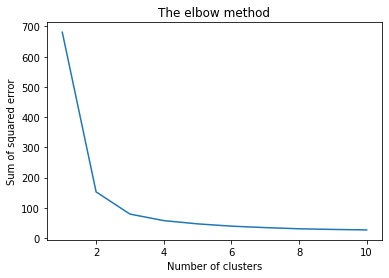

In [22]:
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wsse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error') # Within cluster sum of squares
plt.show()

From the above graph, we see that elbow shape appears at 3. Hence, the optimum no. of Clusters is '3'

# Prediction

In [23]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
Y_pred = kmeans.fit_predict(X)

In [24]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Cluster Centers

In [25]:
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


# Total Observation in 3 Clusters

In [26]:
#count of observation in each clusters 
data["Cluster"]=Y_pred
pd.value_counts(data["Cluster"])

0    62
1    50
2    38
Name: Cluster, dtype: int64

# Visualization of clusters

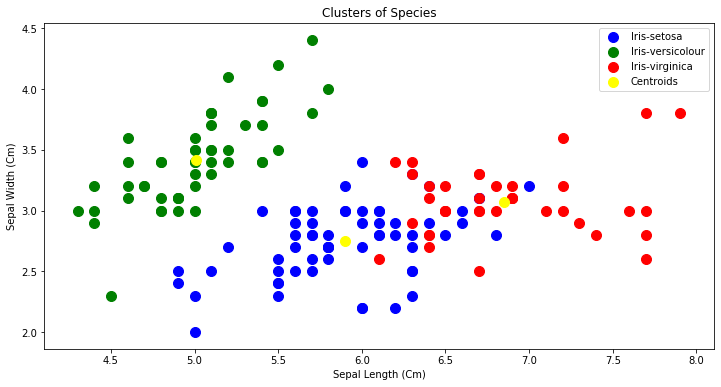

In [27]:
#Visualising the clusters of speal length and speal width

plt.figure(figsize =(12,6))
#plt.scatter(X,Y)
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')
#s==> size of the "dots"(green,red,etc)
#c==> color

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

#label==> name given to a cluster
plt.title('Clusters of Species')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.legend()
plt.show()

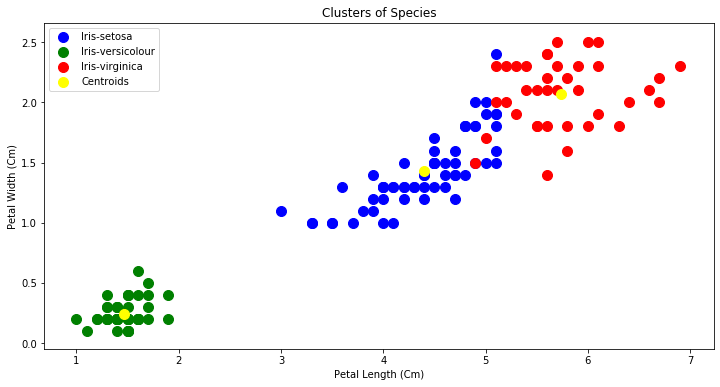

In [28]:
#Visualising the clusters of Petal Length and Petal Width

plt.figure(figsize =(12,6))
#plt.scatter(X,Y)
plt.scatter(X[Y_pred == 0, 2], X[Y_pred == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 2], X[Y_pred == 1, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 2], X[Y_pred == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')
#s==> size of the "dots"(green,red,etc)
#c==> color

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

#label==> name given to a cluster
plt.title('Clusters of Species')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend()
plt.show()
